In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.contrib import rnn

In [44]:
%cd "C:\Users\William\Desktop\chalmers\introduction to artificial inteflitence\AI-Shazam-master"

C:\Users\William\Desktop\chalmers\introduction to artificial inteflitence\AI-Shazam-master


In [45]:
LSTM_size = 50         #ammount of neurons in our hidden layer
x_input_size = 100     #the size of the frequency representation of chunk
time_steps = 2584     #ammount of chunks to fill 1 song, I.e the unrolling time.
#dynamic_step_size = 10000  #total size of song i.e. seconds*(chunk*100)
batch_size = 29         #arbitrary batch size
learning_rate = 0.001   #learning rate
ammount_of_songs = 29  #ammount of songs the network can identify

In [46]:
out_weights=tf.Variable(tf.random_normal([LSTM_size,ammount_of_songs])) #initilize weights for output
out_bias=tf.Variable(tf.random_normal([ammount_of_songs]))              #initialize biases for output

x=tf.placeholder("float",[None,time_steps,x_input_size])         #initialize input placeholder
y=tf.placeholder("float",[None,ammount_of_songs])                       #initialize output placeholder

In [47]:
input=tf.unstack(x,time_steps,1) 
# creates the [batch_size,x_input_size] which we want to assign static_rnn

In [71]:
lstm_hidden_layer=rnn.BasicLSTMCell(LSTM_size,forget_bias=1)       #defines our hidden layer
outputs,_=rnn.static_rnn(lstm_hidden_layer,input,dtype="float")  #handles output

ValueError: Variable rnn/basic_lstm_cell/kernel already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\Users\William\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()
  File "C:\Users\William\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3274, in create_op
    op_def=op_def)
  File "C:\Users\William\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 488, in new_func
    return func(*args, **kwargs)


In [49]:
prediction=tf.matmul(outputs[-1],out_weights)+out_bias             #predicts the song

In [ ]:
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels=y))
opt=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)


correct_prediction=tf.equal(tf.argmax(prediction,1),tf.argmax(y,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

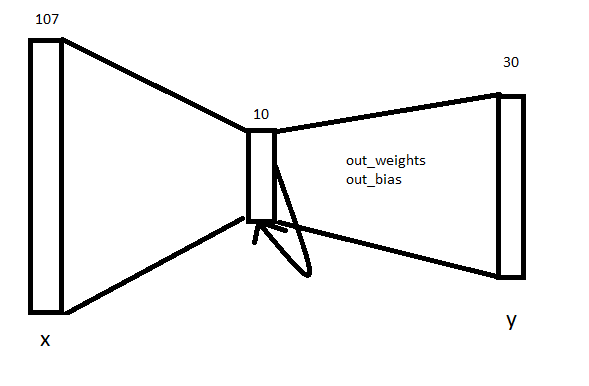

In [51]:
import pickle as pk
import numpy as np

def getData():
	with open("data\\xs.pkl", "rb") as file:
		x = pk.load(file)
	with open("data\\ys.pkl", "rb") as file:
		y = pk.load(file)
	songs = 30
	indices = []
	i = 0
	for j in range(songs):
		indices.append(i)
		while i<y.shape[0] and y[i,j]:
			i+=1
	return x, y, songs, indices

In [69]:
x_songs = np.zeros((29,258400), "float")
x_songs.shape


(29, 258400)

In [70]:


x,y,songs,indices = getData()

i=0
for j in range(29):
        z=0
        print(j)
        while i<indices[j+1]:
            h=0
            while h<100:
                x_songs[j,z] = x[i,h]
              # print("song {} {} filled of song X > {},{} number: {} ".format(j, (z/258400), i, h,x[i,h]))
              # print(newInit[j,z])
                z+=1
                h+=1
            i+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [72]:
batch_x = x_songs
batch_x=batch_x.reshape((batch_size,time_steps,x_input_size))
batch_x.shape


(29, 2584, 100)

In [78]:
Data = [[[i+j] for i in range(5)] for j in range(100)]


NameError: name 'dim' is not defined

In [67]:
answers_y = np.identity(29, "float")
answers_y

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0

In [68]:
#initialize variables
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    iter=1
    while iter<800:
        batch_x = x_songs
        batch_y= answers_y

        batch_x=batch_x.reshape((batch_size,time_steps,x_input_size))

        sess.run(opt, feed_dict={x: batch_x, y: batch_y})

        if iter %10==0:
            acc=sess.run(accuracy,feed_dict={x:batch_x,y:batch_y})
            los=sess.run(loss,feed_dict={x:batch_x,y:batch_y})
            print("For iter ",iter)
            print("Accuracy ",acc)
            print("Loss ",los)
            print("__________________")

        iter=iter+1

TypeError: unhashable type: 'numpy.ndarray'